In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df = pd.read_csv('/home/silver/Laptop-Price-Prediction/laptop.csv')

In [114]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [115]:
df=df.drop(columns="Unnamed: 0")

In [116]:
df.shape

(1303, 11)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [118]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

Extract numerical values

In [119]:
import re 

In [120]:
a = df['Ram'].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else None)

In [121]:
a

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: int64

In [122]:
df["Ram"]= a

In [123]:
a = df['Weight'].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else None)

In [124]:
df['Weight'] = a

In [125]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2,40705.9200


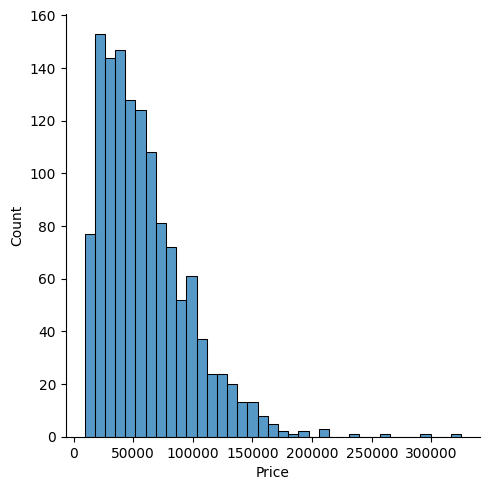

In [126]:
sns.displot(df['Price'])

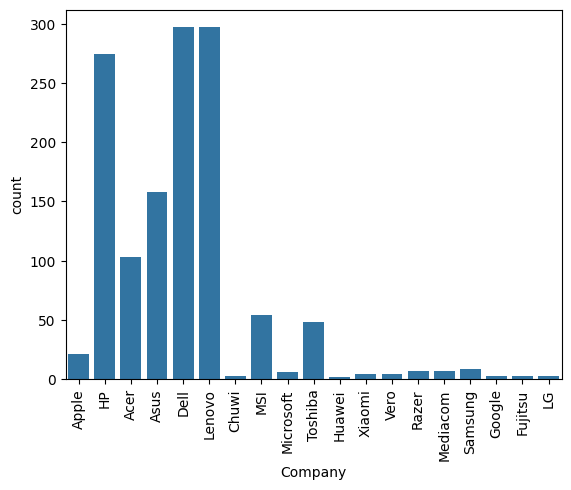

In [127]:
sns.countplot(x = df["Company"])
plt.xticks(rotation="vertical")
plt.show()

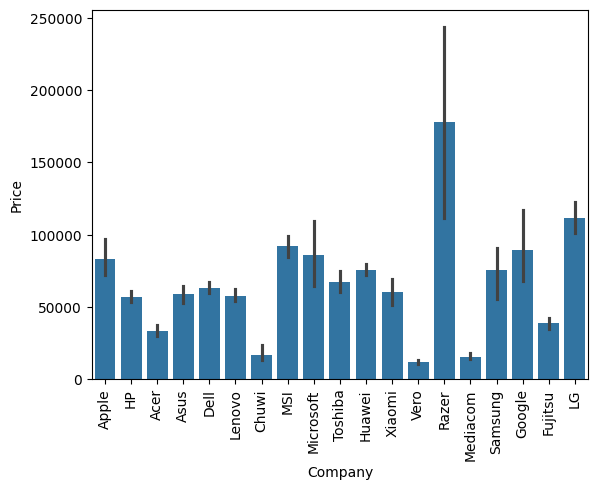

In [128]:
sns.barplot(x=df["Company"], y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

<Axes: xlabel='TypeName'>

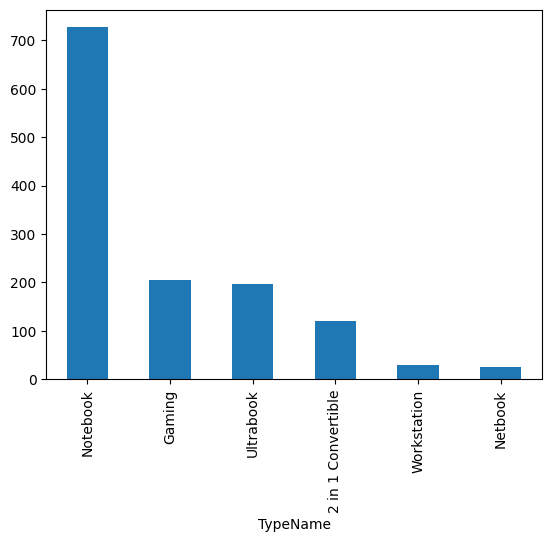

In [129]:
df["TypeName"].value_counts().plot(kind="bar")

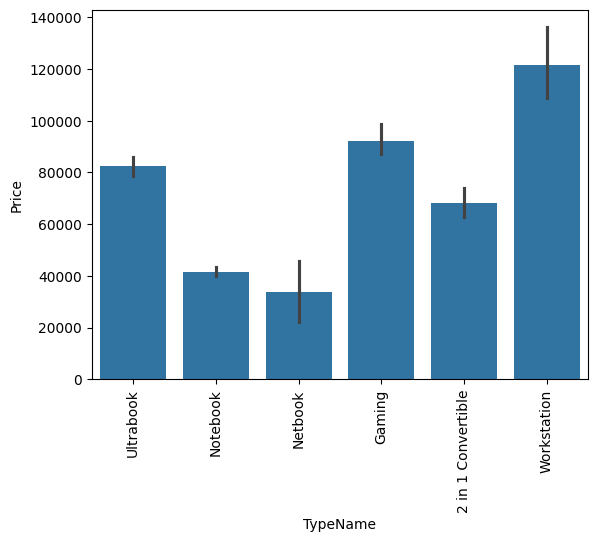

In [130]:
sns.barplot(x=df["TypeName"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [131]:
df=df.drop(columns=["Inches", "ScreenResolution"])

In [133]:
Storage=df["Memory"].str.split(" ").str[0]
Storage_type = df["Memory"].str.split(" ").str[1:].str.join(" ")

df.insert(6, 'Storage', Storage)
df.insert(7, 'Storage Type', Storage_type)


In [134]:
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,Storage,Storage Type,OpSys,Weight,Price
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,128GB,SSD,macOS,1,71378.6832
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,128GB,Flash Storage,macOS,1,47895.5232
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,256GB,SSD,No OS,1,30636.0000
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,512GB,SSD,macOS,1,135195.3360
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,256GB,SSD,macOS,1,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,128GB,SSD,Windows 10,1,33992.6400
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,512GB,SSD,Windows 10,1,79866.7200
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,64GB,Flash Storage,Windows 10,1,12201.1200
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,1TB,HDD,Windows 10,2,40705.9200


In [135]:
df=df.drop(columns="Memory")

In [136]:
df

,Company,TypeName,Cpu,Ram,Gpu,Storage,Storage Type,OpSys,Weight,Price
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,128GB,SSD,macOS,1,71378.6832
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,128GB,Flash Storage,macOS,1,47895.5232
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,256GB,SSD,No OS,1,30636.0000
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,512GB,SSD,macOS,1,135195.3360
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,256GB,SSD,macOS,1,96095.8080
...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,128GB,SSD,Windows 10,1,33992.6400
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,512GB,SSD,Windows 10,1,79866.7200
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,64GB,Flash Storage,Windows 10,1,12201.1200
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,1TB,HDD,Windows 10,2,40705.9200


In [137]:
df["Ram"].value_counts() 

Ram
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

In [138]:
df["Weight"].value_counts()

Weight
2    628
1    568
3     54
4     35
0     18
Name: count, dtype: int64

In [139]:
df[df["Ram"]==64]

,Company,TypeName,Cpu,Ram,Gpu,Storage,Storage Type,OpSys,Weight,Price
1066,Asus,Gaming,Intel Core i7 6820HK 2.7GHz,64,Nvidia GeForce GTX 980,1TB,SSD,Windows 10,3,211788.0


In [140]:
df["OpSys"].value_counts()


OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [141]:
df["Cpu"].value_counts()


Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [145]:
processor_name=df["Cpu"].str.split(" ").str[0:4]
processor_name=list(processor_name)

count=0
for i in processor_name:
        if(i[0]=="Intel" and i[1]=="Core" ):
            count=count+1
count

1105

In [ ]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [150]:
df

,Company,TypeName,Cpu,Ram,Gpu,Storage,Storage Type,OpSys,Weight,Price,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,128GB,SSD,macOS,1,71378.6832,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,128GB,Flash Storage,macOS,1,47895.5232,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,256GB,SSD,No OS,1,30636.0000,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,512GB,SSD,macOS,1,135195.3360,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,256GB,SSD,macOS,1,96095.8080,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,128GB,SSD,Windows 10,1,33992.6400,Intel Core i7
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,512GB,SSD,Windows 10,1,79866.7200,Intel Core i7
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,64GB,Flash Storage,Windows 10,1,12201.1200,Intel Celeron Dual
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,1TB,HDD,Windows 10,2,40705.9200,Intel Core i7


In [ ]:


def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
     


In [152]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)


<Axes: xlabel='Cpu brand', ylabel='Price'>

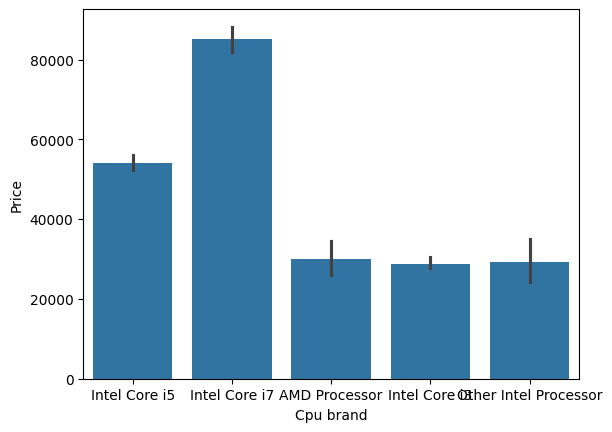

In [153]:
sns.barplot(x=df["Cpu brand"],y=df["Price"])

In [154]:
df=df.drop(columns=["Cpu","Cpu Name"])

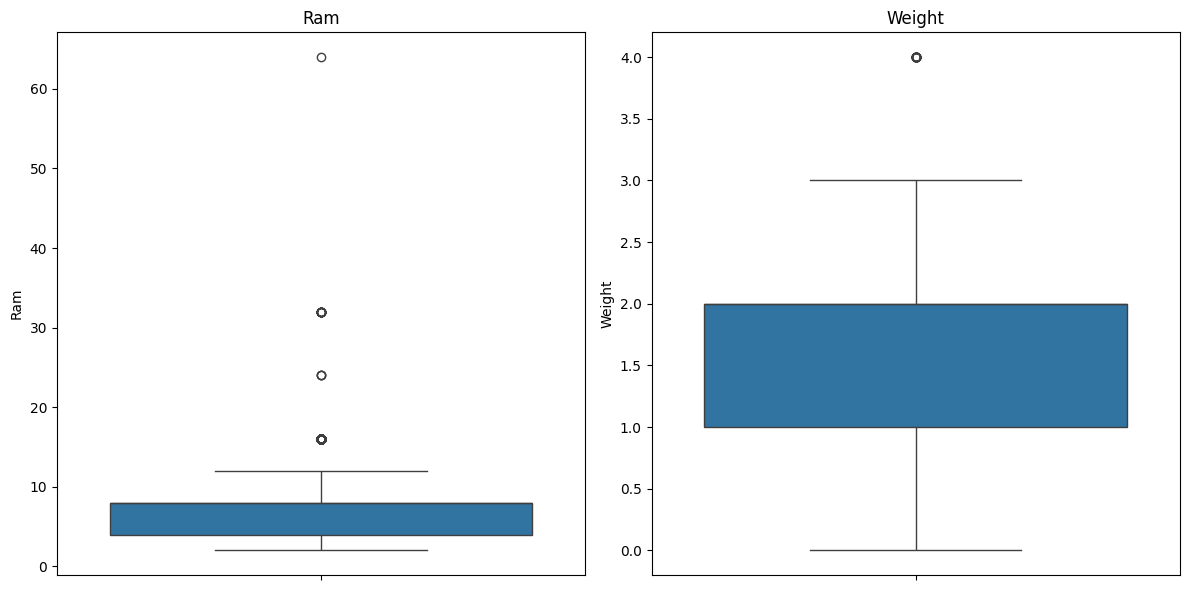

In [155]:
i=["Ram","Weight"]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  
col_idx = 0

for col in i:
    sns.boxplot(df[col], ax=axs[col_idx])
    axs[col_idx].set_title(col) 
    col_idx += 1

plt.tight_layout()
plt.show()


     


/tmp/ipykernel_11072/3482677343.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axs[col_idx])
/tmp/ipykernel_11072/3482677343.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axs[col_idx])


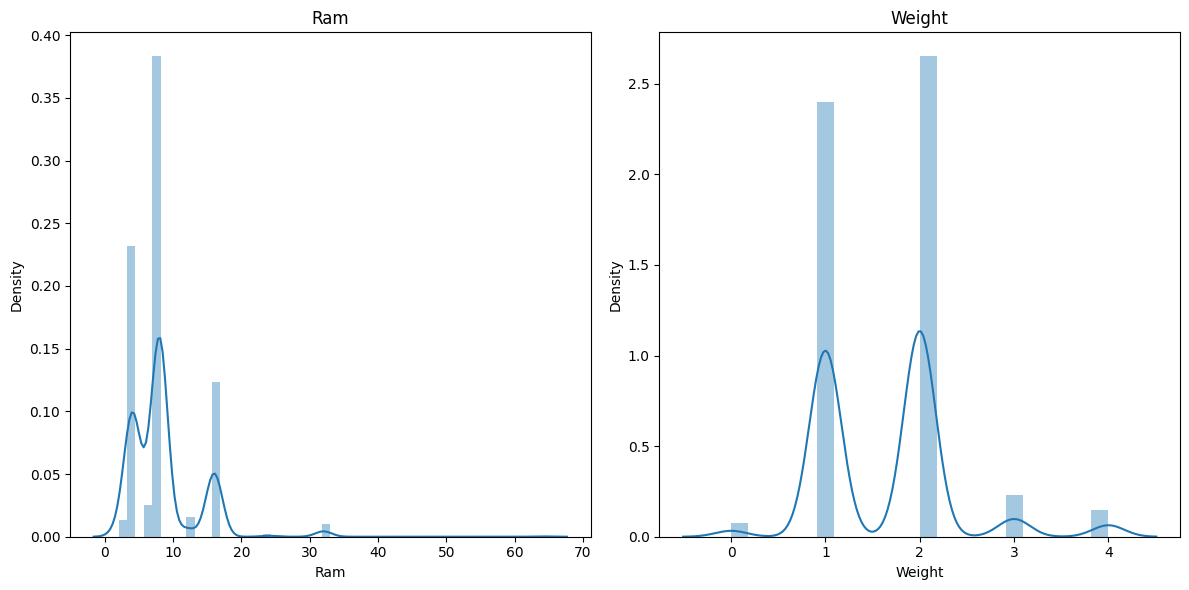

In [156]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  
col_idx = 0

for col in i:
    sns.distplot(df[col], ax=axs[col_idx])
    axs[col_idx].set_title(col) 
    col_idx += 1

plt.tight_layout()
plt.show()